In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [2]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

for layer in base_model.layers:
    layer.trainable = False

In [3]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

In [4]:
### DATA GENERATOR ###
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255
        )

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size = (200,200),
    batch_size=2,
    class_mode="categorical"
)

Found 3777 images belonging to 8 classes.


In [5]:
## ADD FINAL LAYER
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(8, activation='softmax')(x)

# this is the model we will train
model = Model(input=base_model.input, output=predictions)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

(720, 1280, 3)

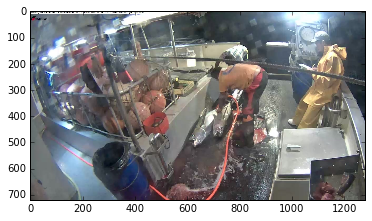

In [ ]:
## TEST ONE PICTURE ##
from keras.preprocessing.image import load_img, img_to_array
from matplotlib.pyplot import imshow
%matplotlib inline
im = load_img('data/train/ALB/img_00029.jpg')
imshow(im)
img_to_array(im).shape

In [ ]:
model.fit_generator(
        train_generator,
        samples_per_epoch=2000,
        nb_epoch=50)

Epoch 1/50
2000/2000 [==============================] - 174s - loss: 2.2965   
Epoch 2/50
 346/2000 [====>.........................] - ETA: 151s - loss: 1.8524